## Importamos librerias

In [444]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import * 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import joblib

## Load data

In [445]:
df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [446]:
df.shape

(1599, 12)

### EDA

### valores unicos 

In [447]:
unicos = df.nunique()
df[unicos[unicos==1].index]
# No hay columnas con un solo valor único

""
0
1
2
3
4
...
1594
1595
1596
1597


### Duplicados 

In [448]:
dupl_data = df.duplicated().sum()
if dupl_data != 0:
    print(f" hay {dupl_data} valores duplicados")
else:
    print(f"No hay duplicados")


 hay 240 valores duplicados


In [449]:
df.drop_duplicates(inplace=True)


In [450]:
df.duplicated().sum()

np.int64(0)

In [451]:
df.shape
# Se eliminaron 240 filas duplicadas

(1359, 12)

### Valores faltantes 

In [452]:
faltantes = df.isna().mean()*100
faltantes

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

### Posibles 0 esconcidos 


In [453]:
zero_percent = ((df == 0).sum() / len(df) * 100).sort_values(ascending=False)
zero_percent.to_frame(name='percent_zeros')
(print(zero_percent[zero_percent > 0]))

citric acid    8.682855
dtype: float64


### Graficamos 

In [454]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

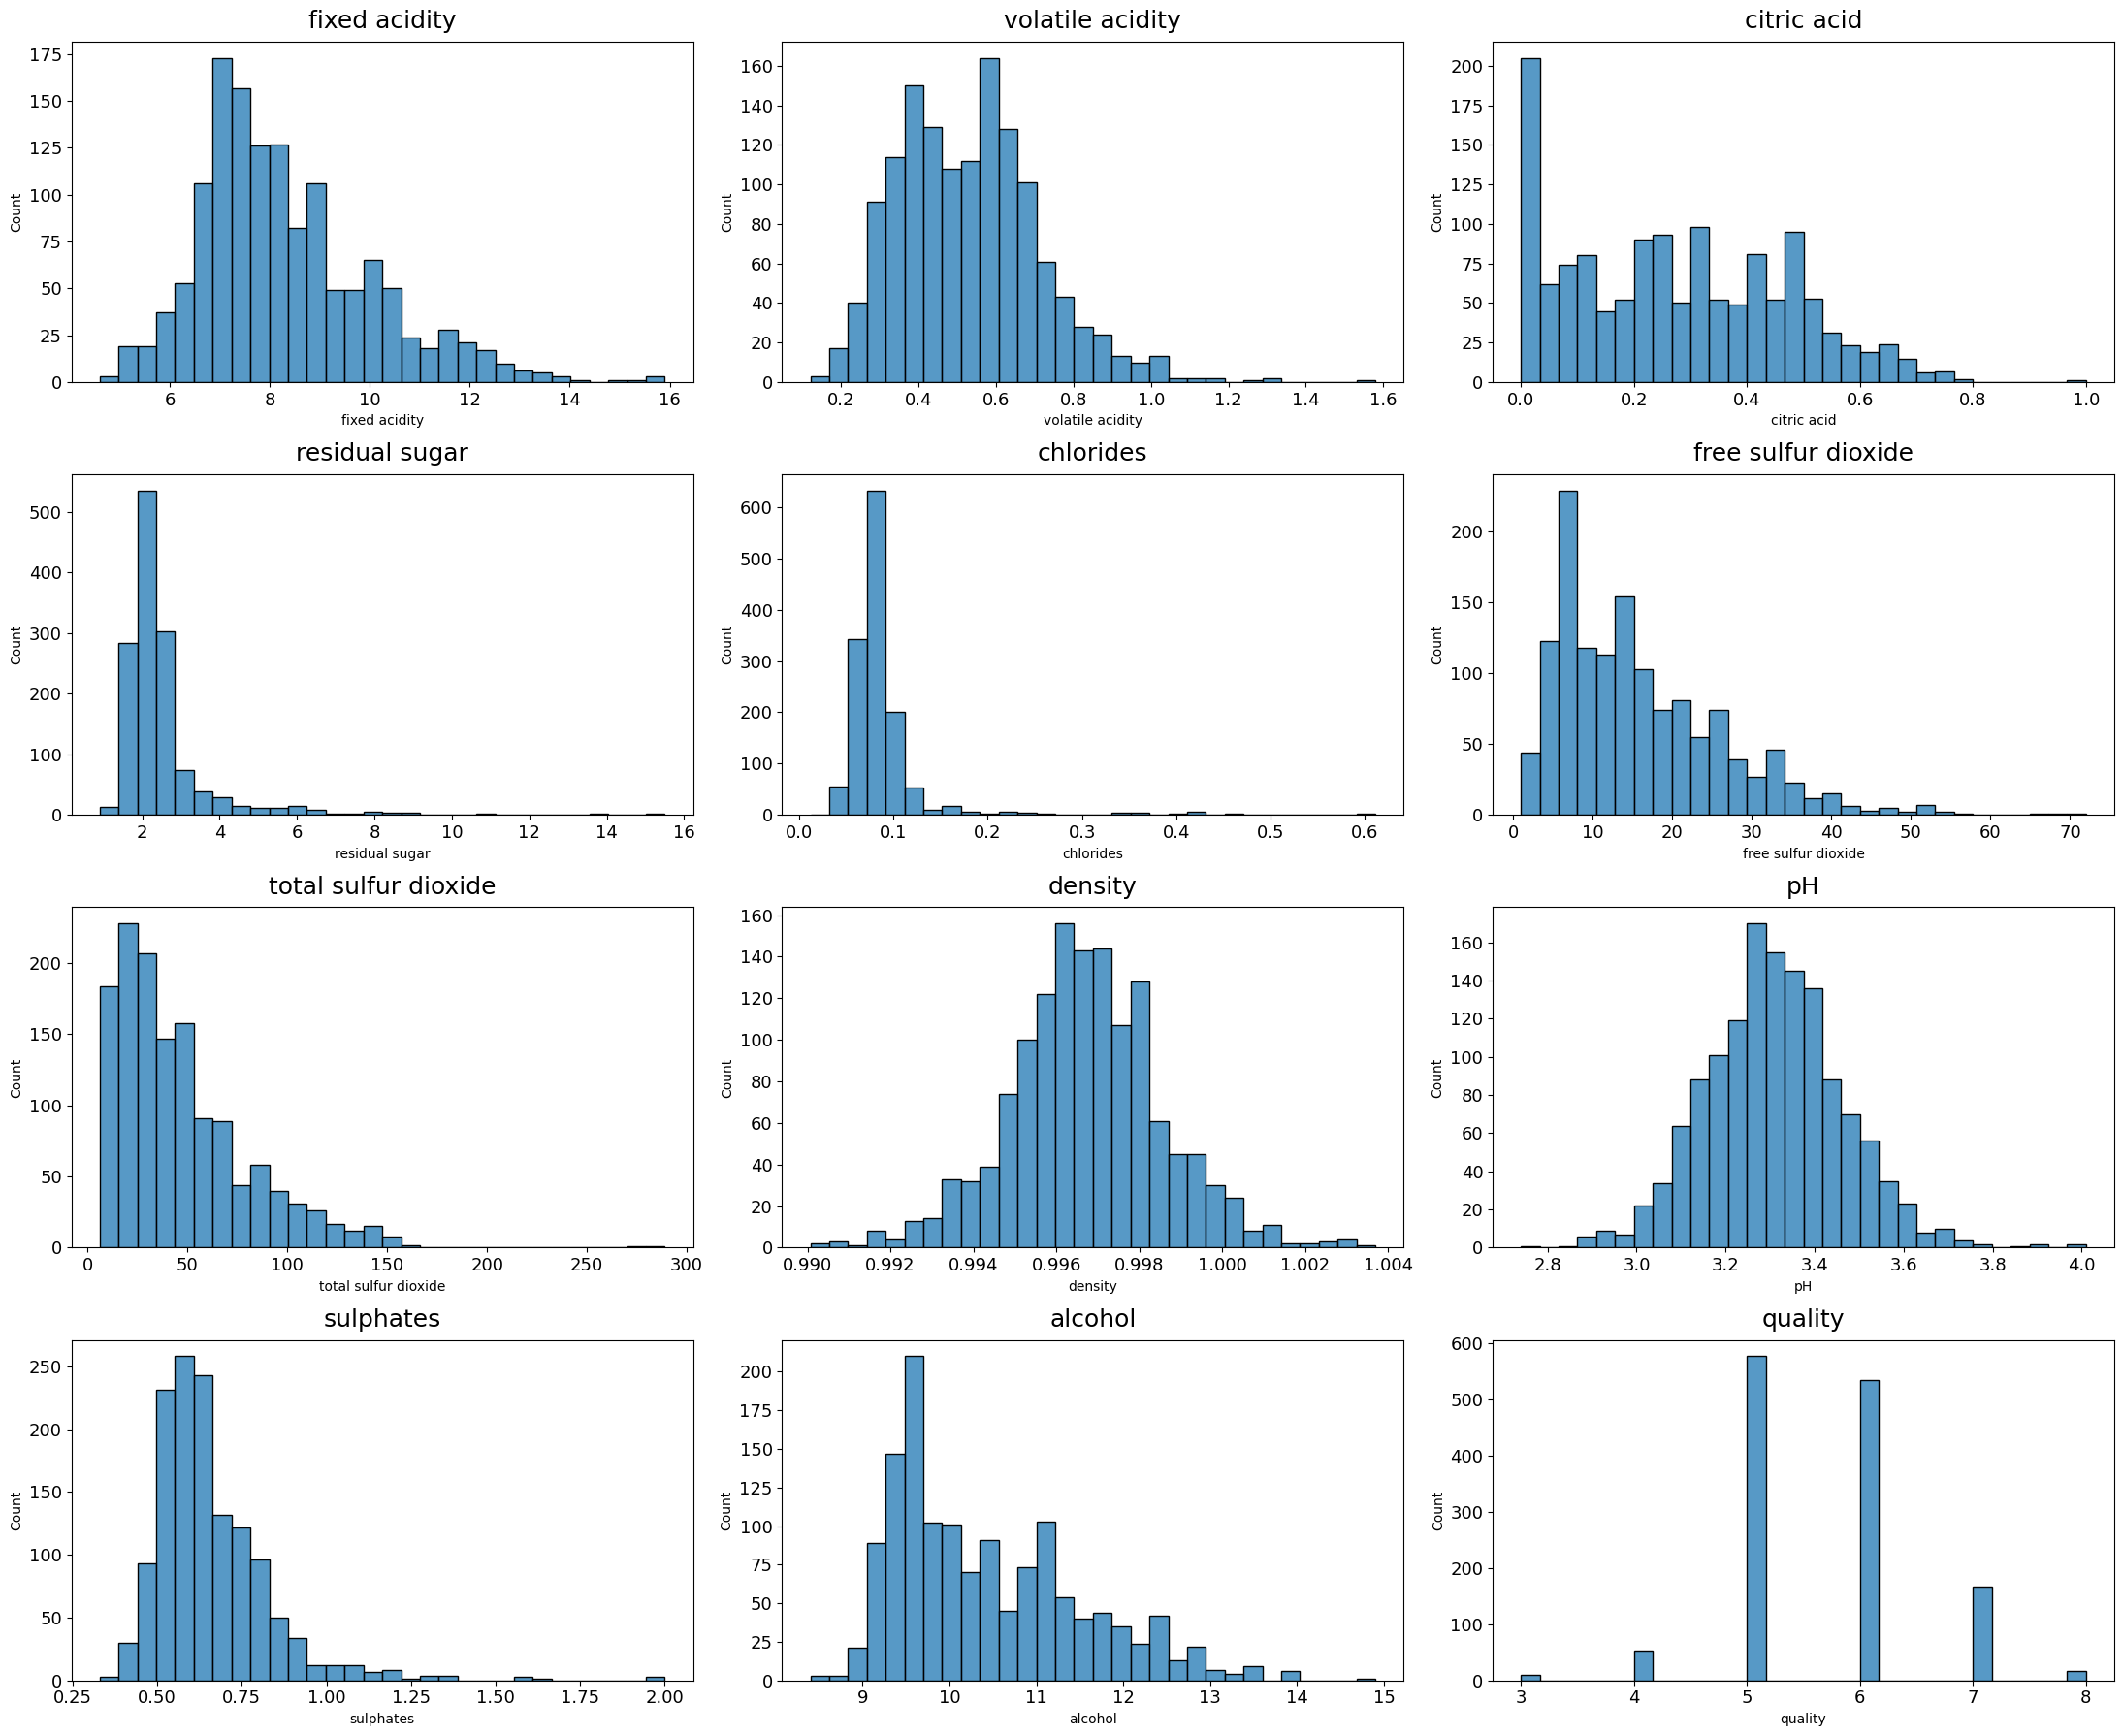

In [455]:
plt_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(4, 3, figsize=(22, 18)) 
axes = axes.flatten()

for i, column in enumerate(plt_columns):
    sns.histplot(
        data=df,
        x=column,
        ax=axes[i],
        bins=30
    )

    axes[i].set_title(column, fontsize=18, pad=10)
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)


for j in range(len(plt_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [456]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

#### Como podemos ver en el skew y en los graficos los datos no estan distribuidos normal

In [457]:
#Aplicamos a la varible objetivo un escalado manual 
df["quality_sc"] = df["quality"].apply(
    lambda x: 0 if x <= 4 else (1 if x <= 6 else 2))

In [458]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
quality_sc              0.578808
dtype: float64

## Split

In [459]:
X = df.drop(columns =['quality','quality_sc'],axis=1)
y = df['quality_sc']
y.value_counts()

quality_sc
1    1112
2     184
0      63
Name: count, dtype: int64

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hay que estandarizar los datos antes de entrenar el modelo KNN

## KNN 

In [461]:
# Datos sin escalar 
raw_data = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(X_train, y_train).predict(X_test)

# k-NN con datos escalados usando StandardScaler
sc_standard = StandardScaler().fit(X_train)
knn_standard = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(sc_standard.transform(X_train), y_train).predict(sc_standard.transform(X_test))

# k-NN con datos escalados usando MinMaxScaler
sc_norm = MinMaxScaler().fit(X_train)
knn_mmx = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(sc_norm.transform(X_train), y_train).predict(sc_norm.transform(X_test))


In [462]:
print(f'Reporte para los datos sin escalar:\n{classification_report(y_test, raw_data)}')
print(f'Reporte para los datos estandarizados:\n{classification_report(y_test, knn_standard)}')
print(f'Reporte para los datos normalizados:\n{classification_report(y_test, knn_mmx)}')

Reporte para los datos sin escalar:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25        15
           1       0.86      0.92      0.89       223
           2       0.43      0.29      0.35        34

    accuracy                           0.81       272
   macro avg       0.54      0.47      0.50       272
weighted avg       0.78      0.81      0.79       272

Reporte para los datos estandarizados:
              precision    recall  f1-score   support

           0       0.12      0.07      0.09        15
           1       0.86      0.91      0.89       223
           2       0.55      0.47      0.51        34

    accuracy                           0.81       272
   macro avg       0.51      0.48      0.49       272
weighted avg       0.78      0.81      0.80       272

Reporte para los datos normalizados:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1     

#### Teniendo en cuenta las tres pruebas, veo muy parecidos los datos obtenidos entre "sin escalar " y " datos estandarizados",seria interesante seguir por ambos caminos pero para esta proyecto seguimos el analisis con los datos estandarizados, ya que es el mejor resultado y KNN funciona mejor con esos datos.

Accuracy: 0.8051470588235294
None


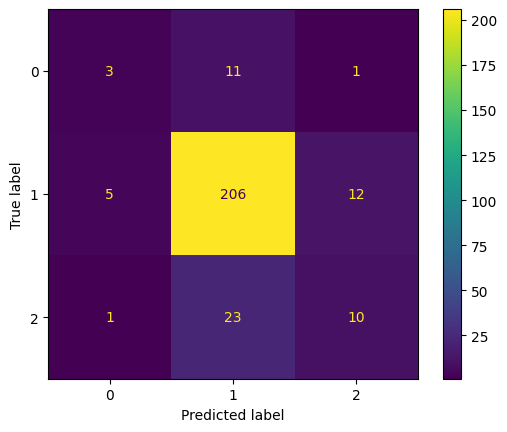

In [463]:
cm = confusion_matrix(y_test, raw_data)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(print("Accuracy:", accuracy_score(y_test, raw_data)))

Accuracy: 0.8088235294117647
None


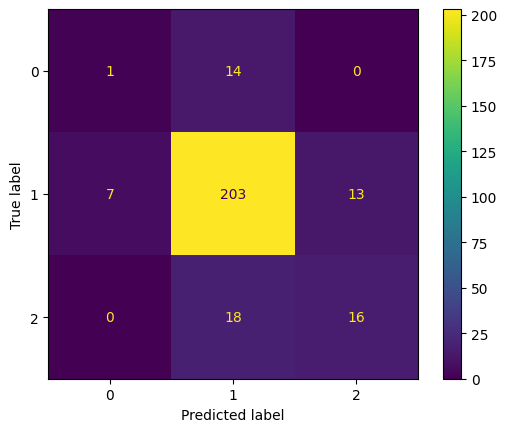

In [464]:
cm = confusion_matrix(y_test, knn_standard)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(print("Accuracy:", accuracy_score(y_test, knn_standard)))

Accuracy: 0.8161764705882353
None


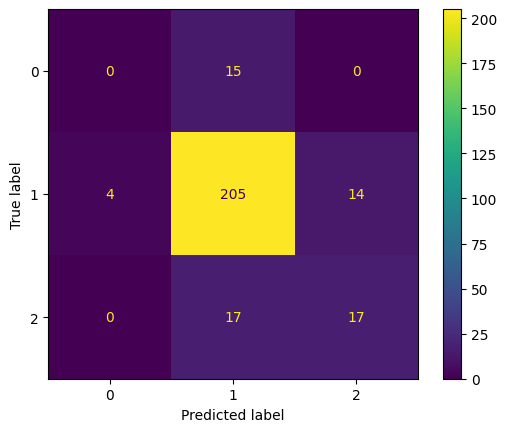

In [465]:
cm = confusion_matrix(y_test, knn_mmx)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(print("Accuracy:", accuracy_score(y_test, knn_mmx)))

### En lo que respecta al accuracy MinmaxScaler es que tiene mejor accuracy 

In [466]:
# Usando un bucle con rango hasta 20 buscamos el mejor accuracy que knn con StandarScaler pueda obtener:

stdr_scaler = StandardScaler()
X_train_sc = stdr_scaler.fit_transform(X_train)
X_test_sc = stdr_scaler.transform(X_test)

accuracy = []


for k in range(1, 21):   
    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn_model.fit(X_train_sc, y_train)
    y_pred = knn_model.predict(X_test_sc)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

    print(f"K = {k}: Accuracy = {acc:.4f}")

best_k = accuracy.index(max(accuracy)) + 1
print(f"\n El mejor K es: {best_k} con accuracy: {max(accuracy):.4f}")


K = 1: Accuracy = 0.7904
K = 2: Accuracy = 0.7868
K = 3: Accuracy = 0.8088
K = 4: Accuracy = 0.8235
K = 5: Accuracy = 0.8199
K = 6: Accuracy = 0.8235
K = 7: Accuracy = 0.8309
K = 8: Accuracy = 0.8346


K = 9: Accuracy = 0.8529
K = 10: Accuracy = 0.8640
K = 11: Accuracy = 0.8566
K = 12: Accuracy = 0.8750
K = 13: Accuracy = 0.8603
K = 14: Accuracy = 0.8640
K = 15: Accuracy = 0.8419
K = 16: Accuracy = 0.8493
K = 17: Accuracy = 0.8493
K = 18: Accuracy = 0.8566
K = 19: Accuracy = 0.8566
K = 20: Accuracy = 0.8640

 El mejor K es: 12 con accuracy: 0.8750


### Graficamos la pregresion de accuracy en el bucle 

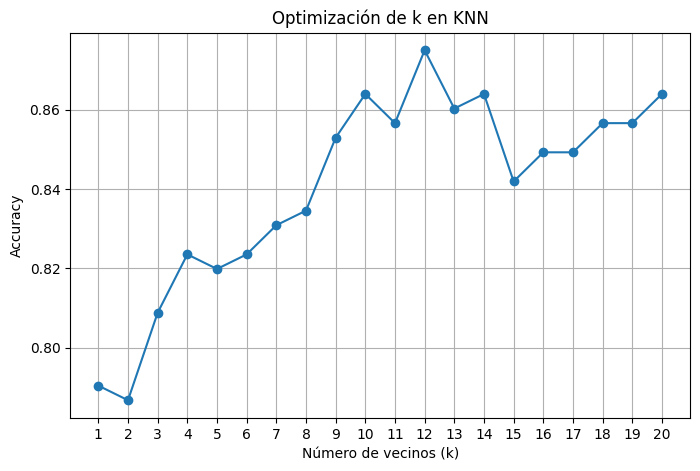

In [467]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), accuracy, marker="o")
plt.title("Optimización de k en KNN")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

## Guardamos StandarScaler y KNN con el mejor resultado de K 

In [468]:

best_knn_model = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute')
best_knn_model.fit(stdr_scaler.transform(X_train), y_train)

joblib.dump(stdr_scaler, "stdr_scaler.pkl")
joblib.dump(best_knn_model, "knn_model.pkl")

['knn_model.pkl']